In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [392]:
# Loading data
file_path = 'Housing_DS.csv'
full_data_table = pd.read_csv(file_path)
print(full_data_table.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [393]:
# Selection of features and target variable
y_column = full_data_table['price']
x_columns = full_data_table[['area', 'bathrooms', 'bedrooms']]

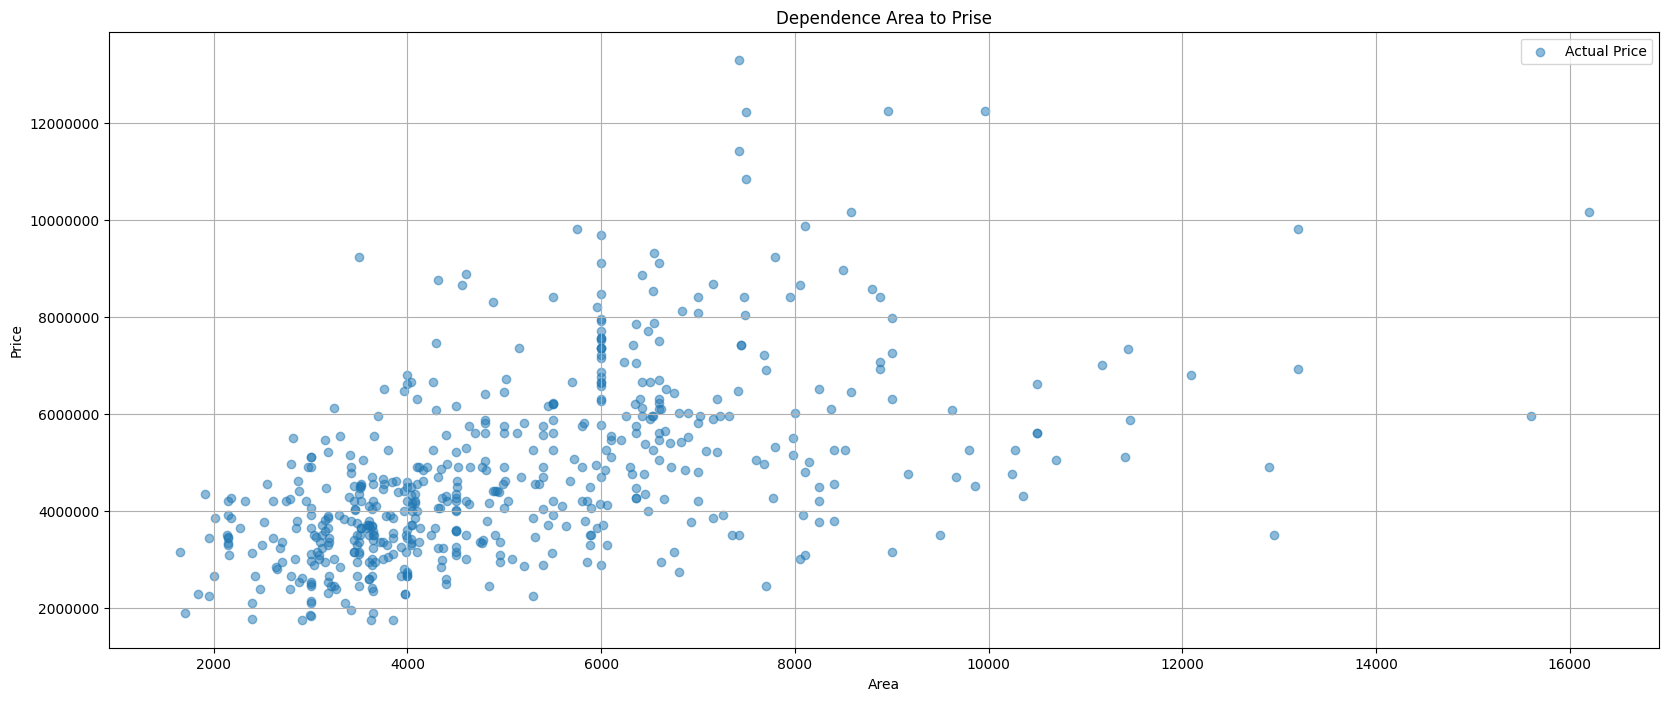

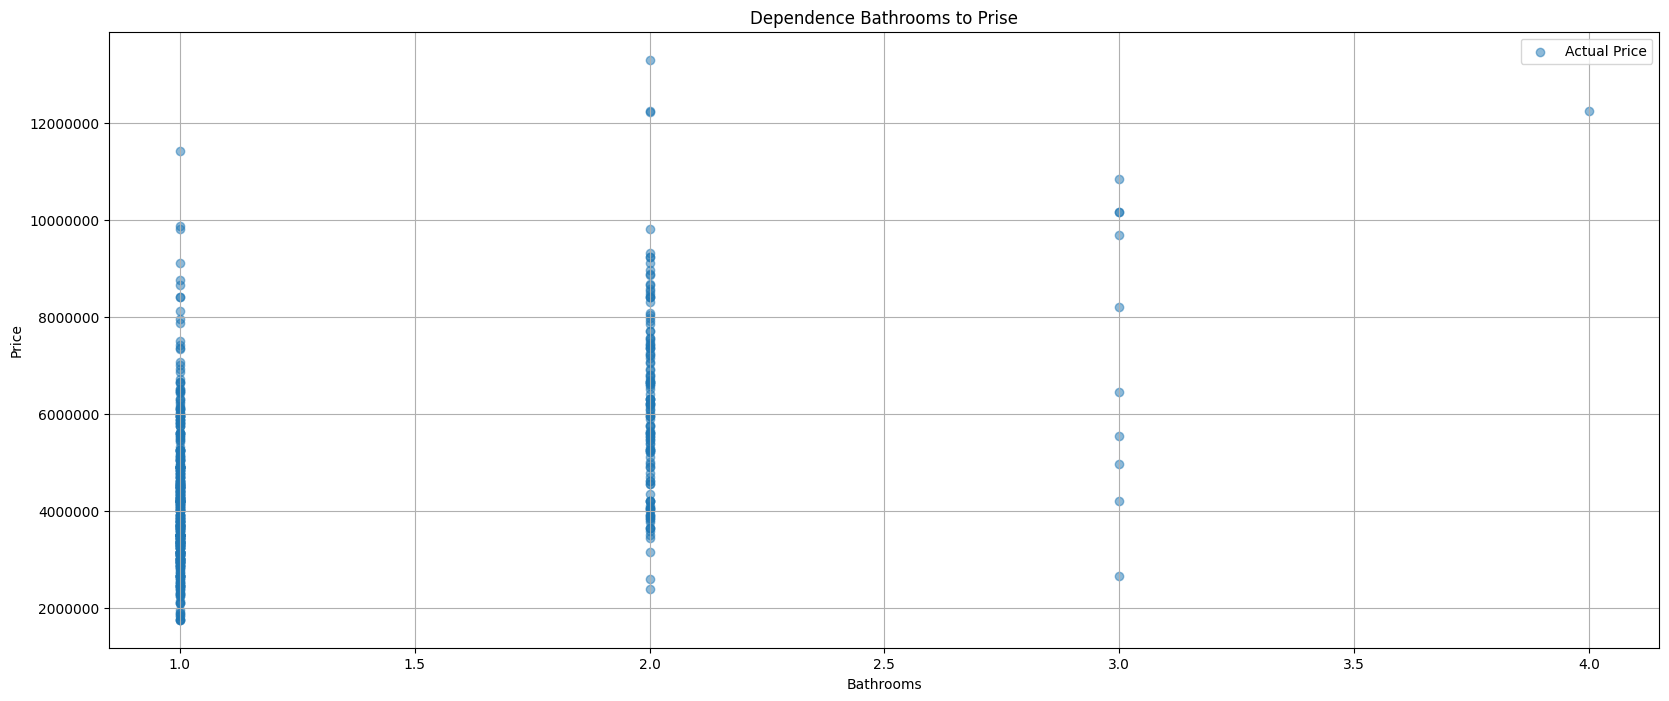

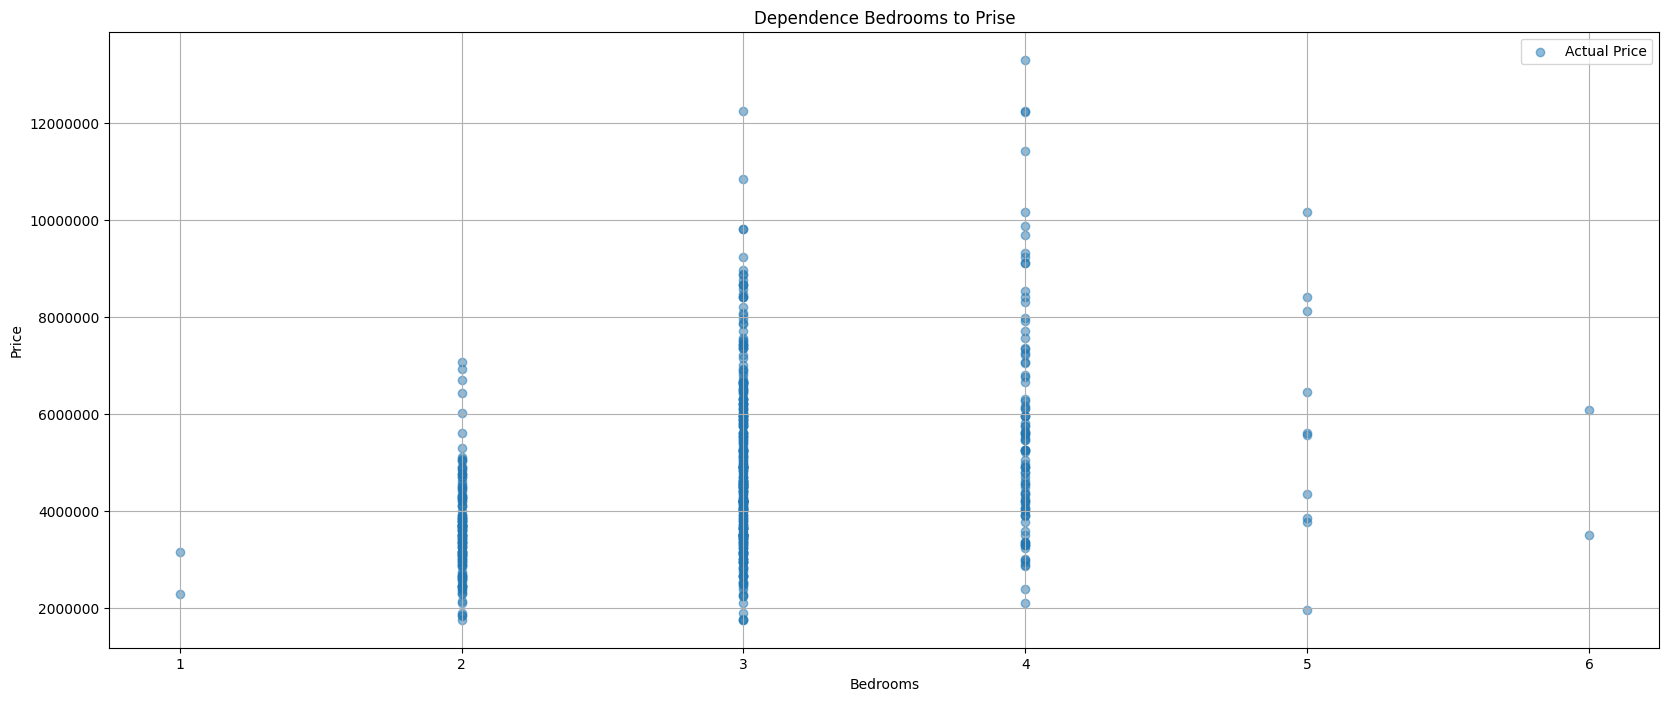

In [394]:
# Graphing the dependence of each feature on the price
for column in x_columns.columns:
    plt.figure(figsize=(20, 8))
    plt.scatter(full_data_table[column], y_column, alpha=0.5, label='Actual Price')
    plt.title(f'Dependence {column.capitalize()} to Prise')
    plt.xlabel(column.capitalize())
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

In [395]:
# Conversion to NumPy arrays
X = np.array(x_columns)
y = np.array(y_column).reshape(-1, 1)

print("Shape of X before adding bias term:", X.shape)
print("First 5 rows of X before adding bias term:\n", X[:5])
print("First 5 rows of y:\n", y[:5])

# Проверка максимальных и минимальных значений
print("Max value in X_scaled:", np.max(X))
print("Min value in X_scaled:", np.min(X))
print("Max value in y:", np.max(y))
print("Min value in y:", np.min(y))

Shape of X before adding bias term: (545, 3)
First 5 rows of X before adding bias term:
 [[7420    2    4]
 [8960    4    4]
 [9960    2    3]
 [7500    2    4]
 [7420    1    4]]
First 5 rows of y:
 [[13300000]
 [12250000]
 [12250000]
 [12215000]
 [11410000]]
Max value in X_scaled: 16200
Min value in X_scaled: 1
Max value in y: 13300000
Min value in y: 1750000


In [396]:
# Adding bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))
print("Shape of X after adding bias term:", X.shape)
print("First 5 rows of X after adding bias term:\n", X[:5])

Shape of X after adding bias term: (545, 4)
First 5 rows of X after adding bias term:
 [[1.00e+00 7.42e+03 2.00e+00 4.00e+00]
 [1.00e+00 8.96e+03 4.00e+00 4.00e+00]
 [1.00e+00 9.96e+03 2.00e+00 3.00e+00]
 [1.00e+00 7.50e+03 2.00e+00 4.00e+00]
 [1.00e+00 7.42e+03 1.00e+00 4.00e+00]]


In [397]:
# Initialize parameters
initial_theta = np.random.randn(X.shape[1], 1) * 0.01
alpha = 0.0000000001
num_iterations = 1000

In [398]:
# Linear regression hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

In [399]:
# Function to calculate the loss function
def compute_loss(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

In [400]:
# Implementation of one step of gradient descent
def gradient_descent_step(X, y, theta, alpha):
    m = len(y)
    predictions = hypothesis(X, theta)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    theta -= alpha * gradient
    return theta

In [401]:
# Finding the best parameters with gradient descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    loss_history = []
    for i in range(num_iterations):
        theta = gradient_descent_step(X, y, theta, alpha)
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)
    return theta, loss_history

# Performing gradient descent
theta, loss_history = gradient_descent(X, y, initial_theta, alpha, num_iterations)
print(f'Obtained parameters (gradient descent): {theta.flatten()}')

Obtained parameters (gradient descent): [1.72886804e-01 8.18216338e+02 2.46343826e-01 5.26931823e-01]


In [402]:
# Finding parameters using an analytical solution
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

theta_analytical = normal_equation(X, y)
print(f'Obtained parameters (analytical solution): {theta_analytical.flatten()}')

Obtained parameters (analytical solution): [-1.73171608e+05  3.78762754e+02  1.38604950e+06  4.06820034e+05]


In [403]:
# Comparison of parameters
print(f'Parameters from gradient descent: {theta.flatten()}')
print(f'Parameters from the analytical solution: {theta_analytical.flatten()}')

Parameters from gradient descent: [1.72886804e-01 8.18216338e+02 2.46343826e-01 5.26931823e-01]
Parameters from the analytical solution: [-1.73171608e+05  3.78762754e+02  1.38604950e+06  4.06820034e+05]


In [404]:
# Calculation of the loss function for both methods
loss_gradient_descent = compute_loss(X, y, theta)
loss_analytical = compute_loss(X, y, theta_analytical)

print(f'Loss function (gradient descent): {loss_gradient_descent}')
print(f'Loss function (analytical solution): {loss_analytical}')

Loss function (gradient descent): 1695331076397.8357
Loss function (analytical solution): 895585024988.6597


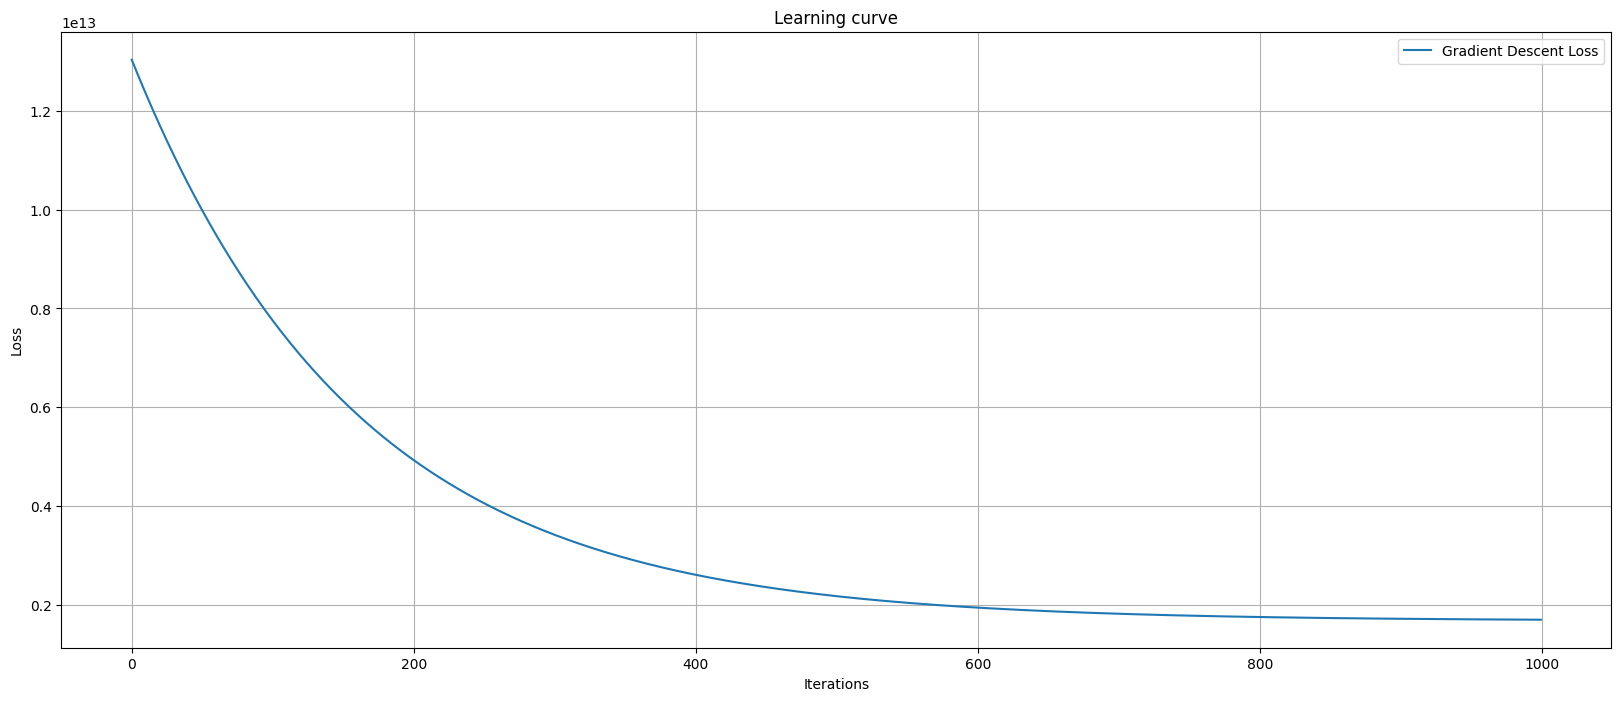

In [405]:
# Loss function graph
plt.figure(figsize=(20, 8))
plt.plot(loss_history, label='Gradient Descent Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.legend()
plt.grid(True)
plt.show()

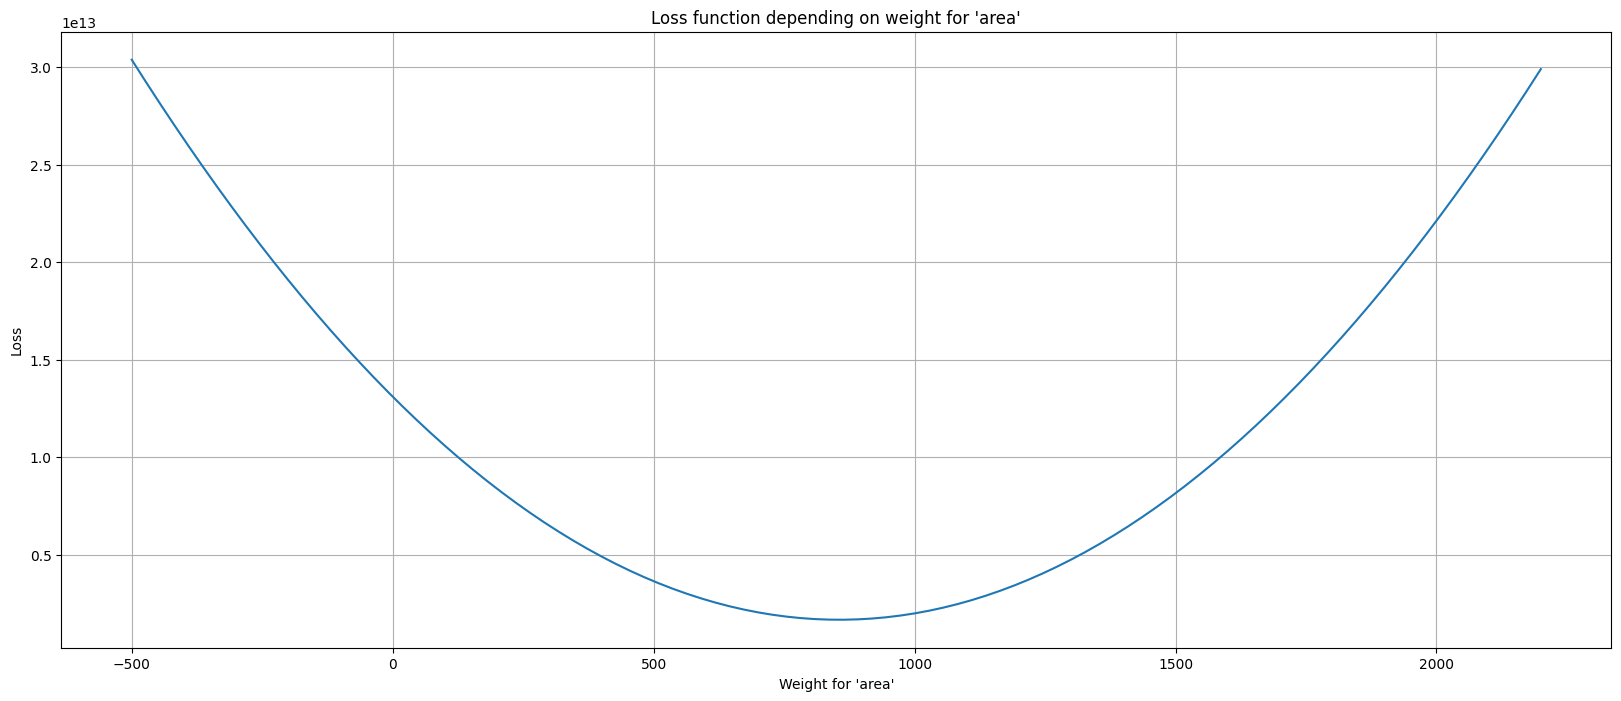

In [406]:
# Diagram of the loss function depending on the weight
x = np.linspace(-500, 2200, 100)
loss_values = []

# Function for calculating losses depending on weight
for w in x:
    theta_test = theta.copy()
    theta_test[1] = w
    loss = compute_loss(X, y, theta_test)
    loss_values.append(loss)

plt.figure(figsize=(20, 8))
plt.plot(x, loss_values)
plt.xlabel("Weight for 'area'")
plt.ylabel("Loss")
plt.title("Loss function depending on weight for 'area'")
plt.grid(True)
plt.show()

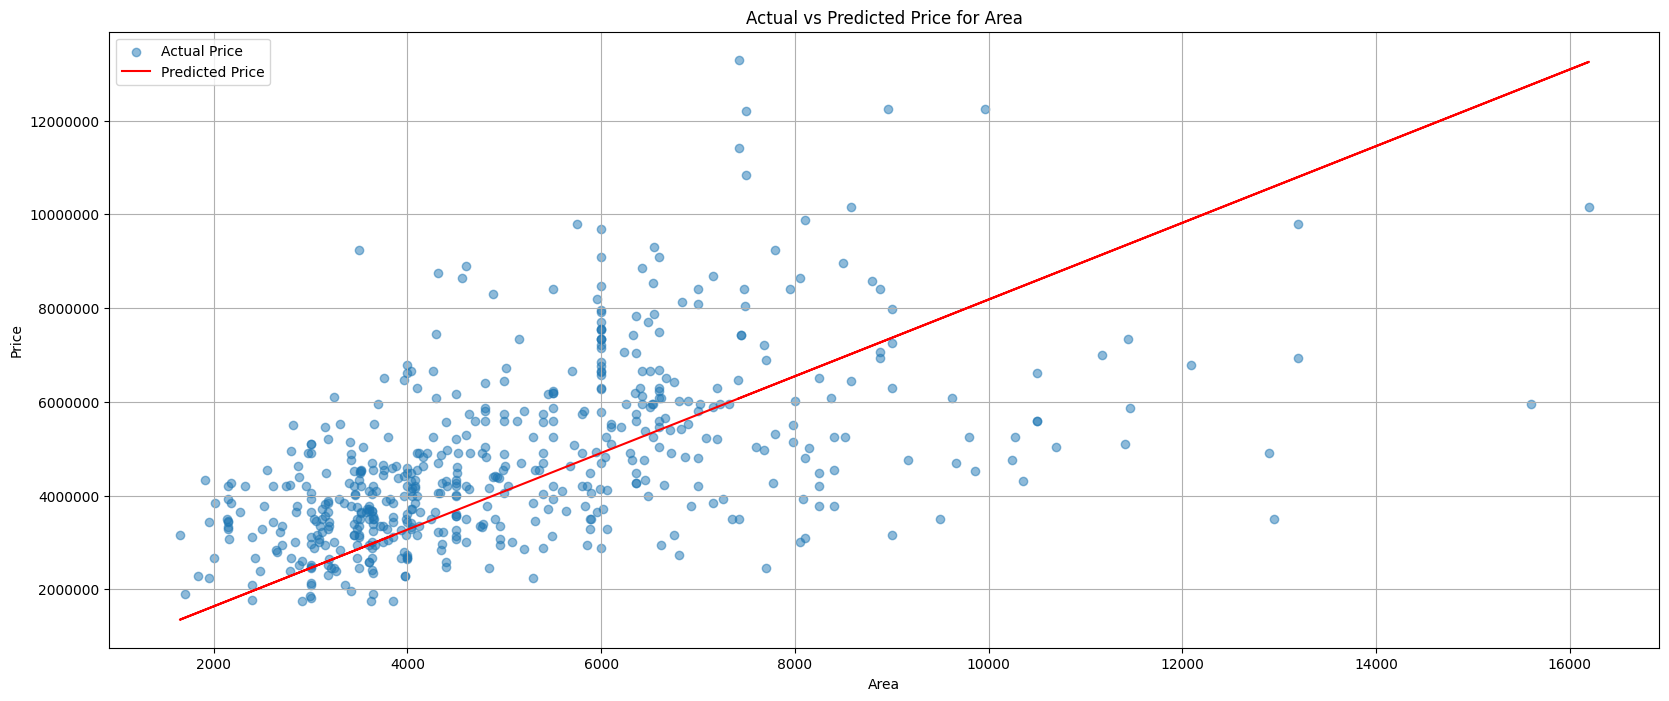

In [407]:
# Visualization of predicted values
area = full_data_table['area'].values
prediction = hypothesis(X, theta)

plt.figure(figsize=(20, 8))
plt.scatter(area, y, alpha=0.5, label='Actual Price')
plt.plot(area, prediction, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Price for Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.show()